In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten,Activation,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator
import keras

In [2]:
(x_train, y_train), (x_test, y_test)=keras.datasets.cifar10.load_data()

In [3]:
# Normalizing
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
model=Sequential()

In [6]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same',kernel_initializer='he_uniform'))  
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(2048,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1024,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [7]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.optimizer.learning_rate=0.001

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)       5

In [9]:
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True,rotation_range=30)
it_train = datagen.flow(x_train,y_train_cat)

In [10]:
callback=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [11]:
steps=int(x_train.shape[0]/64)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
781/781 [==============================] - 34s 39ms/step - loss: 1.8048 - accuracy: 0.3449 - val_loss: 3.3584 - val_accuracy: 0.3120
Epoch 2/30
781/781 [==============================] - 30s 38ms/step - loss: 1.4007 - accuracy: 0.4939 - val_loss: 1.3060 - val_accuracy: 0.5571
Epoch 3/30
781/781 [==============================] - 30s 38ms/step - loss: 1.1866 - accuracy: 0.5805 - val_loss: 1.0460 - val_accuracy: 0.6469
Epoch 4/30
781/781 [==============================] - 30s 38ms/step - loss: 1.0564 - accuracy: 0.6329 - val_loss: 1.0508 - val_accuracy: 0.6680
Epoch 5/30
781/781 [==============================] - 30s 39ms/step - loss: 0.9546 - accuracy: 0.6730 - val_loss: 1.0180 - val_accuracy: 0.6974
Epoch 6/30
781/781 [==============================] - 30s 38ms/step - loss: 0.8846 - accuracy: 0.7005 - val_loss: 0.8626 - val_accuracy: 0.7260
Epoch 7/30
781/781 [==============================] - 30s 38ms/step - loss: 0.8242 - accuracy: 0.7191 - val_loss: 0.7775 - val_accuracy:

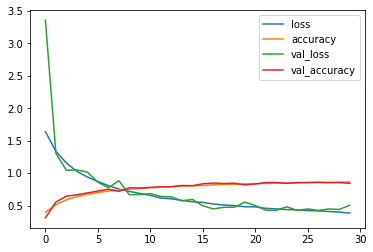

In [12]:
history=model.fit_generator(it_train,epochs=30,steps_per_epoch=steps,validation_data=(x_test,y_test_cat),callbacks=[callback])
pd.DataFrame(history.history).plot()

Epoch 1/30
  3/781 [..............................] - ETA: 25s - loss: 0.3302 - accuracy: 0.8542

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


781/781 [==============================] - 30s 38ms/step - loss: 0.3750 - accuracy: 0.8730 - val_loss: 0.4681 - val_accuracy: 0.8538
Epoch 2/30
781/781 [==============================] - 29s 38ms/step - loss: 0.4151 - accuracy: 0.8581 - val_loss: 0.3896 - val_accuracy: 0.8745
Epoch 3/30
781/781 [==============================] - 30s 38ms/step - loss: 0.3781 - accuracy: 0.8716 - val_loss: 0.4543 - val_accuracy: 0.8563
Epoch 4/30
781/781 [==============================] - 30s 38ms/step - loss: 0.3650 - accuracy: 0.8765 - val_loss: 0.4039 - val_accuracy: 0.8701
Epoch 5/30
781/781 [==============================] - 29s 38ms/step - loss: 0.3528 - accuracy: 0.8796 - val_loss: 0.3845 - val_accuracy: 0.8733
Epoch 6/30
781/781 [==============================] - 29s 38ms/step - loss: 0.3513 - accuracy: 0.8808 - val_loss: 0.3943 - val_accuracy: 0.8716
Epoch 7/30
781/781 [==============================] - 29s 38ms/step - loss: 0.3425 - accuracy: 0.8835 - val_loss: 0.4248 - val_accuracy: 0.8637
Epo

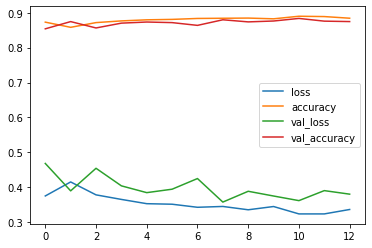

In [13]:
history=model.fit_generator(it_train,epochs=30,steps_per_epoch=steps,validation_data=(x_test,y_test_cat),callbacks=[callback])
pd.DataFrame(history.history).plot()

Epoch 1/30
  3/781 [..............................] - ETA: 25s - loss: 0.2422 - accuracy: 0.9167

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


781/781 [==============================] - 29s 37ms/step - loss: 0.3123 - accuracy: 0.8921 - val_loss: 0.3900 - val_accuracy: 0.8755
Epoch 2/30
781/781 [==============================] - 29s 37ms/step - loss: 0.3115 - accuracy: 0.8921 - val_loss: 0.4044 - val_accuracy: 0.8705
Epoch 3/30
781/781 [==============================] - 29s 37ms/step - loss: 0.3067 - accuracy: 0.8963 - val_loss: 0.3816 - val_accuracy: 0.8810
Epoch 4/30
781/781 [==============================] - 29s 37ms/step - loss: 0.3059 - accuracy: 0.8950 - val_loss: 0.4052 - val_accuracy: 0.8720
Epoch 5/30
781/781 [==============================] - 29s 37ms/step - loss: 0.2946 - accuracy: 0.8983 - val_loss: 0.3513 - val_accuracy: 0.8867
Epoch 6/30
781/781 [==============================] - 29s 37ms/step - loss: 0.2905 - accuracy: 0.8997 - val_loss: 0.3782 - val_accuracy: 0.8787
Epoch 7/30
781/781 [==============================] - 29s 37ms/step - loss: 0.2873 - accuracy: 0.9013 - val_loss: 0.3760 - val_accuracy: 0.8832
Epo

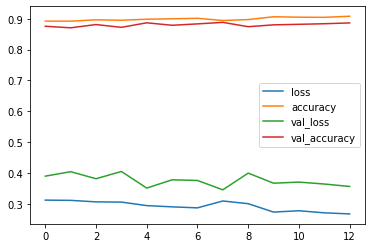

In [14]:
history=model.fit_generator(it_train,epochs=30,steps_per_epoch=steps,validation_data=(x_test,y_test_cat),callbacks=[callback])
pd.DataFrame(history.history).plot()

Epoch 1/30
  3/781 [..............................] - ETA: 26s - loss: 0.1897 - accuracy: 0.9583

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


781/781 [==============================] - 29s 37ms/step - loss: 0.2629 - accuracy: 0.9115 - val_loss: 0.3556 - val_accuracy: 0.8851
Epoch 2/30
781/781 [==============================] - 29s 37ms/step - loss: 0.2595 - accuracy: 0.9112 - val_loss: 0.3688 - val_accuracy: 0.8856
Epoch 3/30
781/781 [==============================] - 29s 37ms/step - loss: 0.2555 - accuracy: 0.9127 - val_loss: 0.3856 - val_accuracy: 0.8792
Epoch 4/30
781/781 [==============================] - 29s 37ms/step - loss: 0.2541 - accuracy: 0.9127 - val_loss: 0.3486 - val_accuracy: 0.8901
Epoch 5/30
781/781 [==============================] - 28s 36ms/step - loss: 0.2529 - accuracy: 0.9148 - val_loss: 0.3815 - val_accuracy: 0.8861
Epoch 6/30
781/781 [==============================] - 28s 36ms/step - loss: 0.2547 - accuracy: 0.9123 - val_loss: 0.3488 - val_accuracy: 0.8963
Epoch 7/30
781/781 [==============================] - 28s 36ms/step - loss: 0.2482 - accuracy: 0.9150 - val_loss: 0.3464 - val_accuracy: 0.8904
Epo

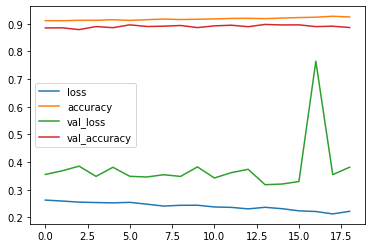

In [15]:
history=model.fit_generator(it_train,epochs=30,steps_per_epoch=steps,validation_data=(x_test,y_test_cat),callbacks=[callback])
pd.DataFrame(history.history).plot()

Epoch 1/30
  3/781 [..............................] - ETA: 26s - loss: 0.1740 - accuracy: 0.9062

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


781/781 [==============================] - 29s 37ms/step - loss: 0.2154 - accuracy: 0.9252 - val_loss: 0.3511 - val_accuracy: 0.8945
Epoch 2/30
781/781 [==============================] - 29s 38ms/step - loss: 0.2112 - accuracy: 0.9271 - val_loss: 0.3809 - val_accuracy: 0.8993
Epoch 3/30
781/781 [==============================] - 29s 37ms/step - loss: 0.2124 - accuracy: 0.9286 - val_loss: 0.3734 - val_accuracy: 0.8870
Epoch 4/30
781/781 [==============================] - 30s 38ms/step - loss: 0.2059 - accuracy: 0.9294 - val_loss: 0.3744 - val_accuracy: 0.8944
Epoch 5/30
781/781 [==============================] - 30s 38ms/step - loss: 0.2138 - accuracy: 0.9261 - val_loss: 0.3253 - val_accuracy: 0.9009
Epoch 6/30
781/781 [==============================] - 29s 37ms/step - loss: 0.2057 - accuracy: 0.9293 - val_loss: 0.3637 - val_accuracy: 0.8930
Epoch 7/30
781/781 [==============================] - 29s 37ms/step - loss: 0.2055 - accuracy: 0.9314 - val_loss: 0.3774 - val_accuracy: 0.8961
Epo

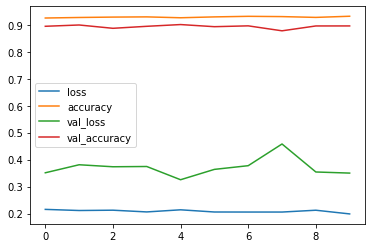

In [16]:
history=model.fit_generator(it_train,epochs=30,steps_per_epoch=steps,validation_data=(x_test,y_test_cat),callbacks=[callback])
pd.DataFrame(history.history).plot()

Epoch 1/30
  3/781 [..............................] - ETA: 26s - loss: 0.1794 - accuracy: 0.9375

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


781/781 [==============================] - 30s 38ms/step - loss: 0.2001 - accuracy: 0.9317 - val_loss: 0.3992 - val_accuracy: 0.8906
Epoch 2/30
781/781 [==============================] - 29s 38ms/step - loss: 0.1928 - accuracy: 0.9336 - val_loss: 0.3696 - val_accuracy: 0.8967
Epoch 3/30
781/781 [==============================] - 30s 38ms/step - loss: 0.2002 - accuracy: 0.9306 - val_loss: 0.4846 - val_accuracy: 0.8909
Epoch 4/30
781/781 [==============================] - 30s 38ms/step - loss: 0.1845 - accuracy: 0.9371 - val_loss: 0.3985 - val_accuracy: 0.8978
Epoch 5/30
781/781 [==============================] - 30s 38ms/step - loss: 0.1909 - accuracy: 0.9345 - val_loss: 0.3578 - val_accuracy: 0.8968
Epoch 6/30
781/781 [==============================] - 30s 38ms/step - loss: 0.1915 - accuracy: 0.9350 - val_loss: 0.3501 - val_accuracy: 0.9006
Epoch 7/30
781/781 [==============================] - 30s 38ms/step - loss: 0.1869 - accuracy: 0.9365 - val_loss: 0.3694 - val_accuracy: 0.8931
Epo

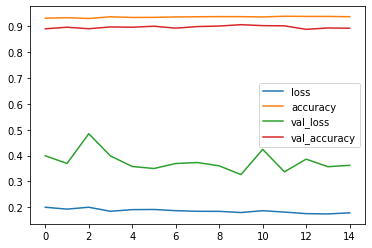

In [17]:
history=model.fit_generator(it_train,epochs=30,steps_per_epoch=steps,validation_data=(x_test,y_test_cat),callbacks=[callback])
pd.DataFrame(history.history).plot()

In [19]:
evaluation = model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 3s 11ms/step - loss: 0.3308 - accuracy: 0.9022
Test Accuracy: 0.9021999835968018


In [20]:
!pip install keras_visualizer

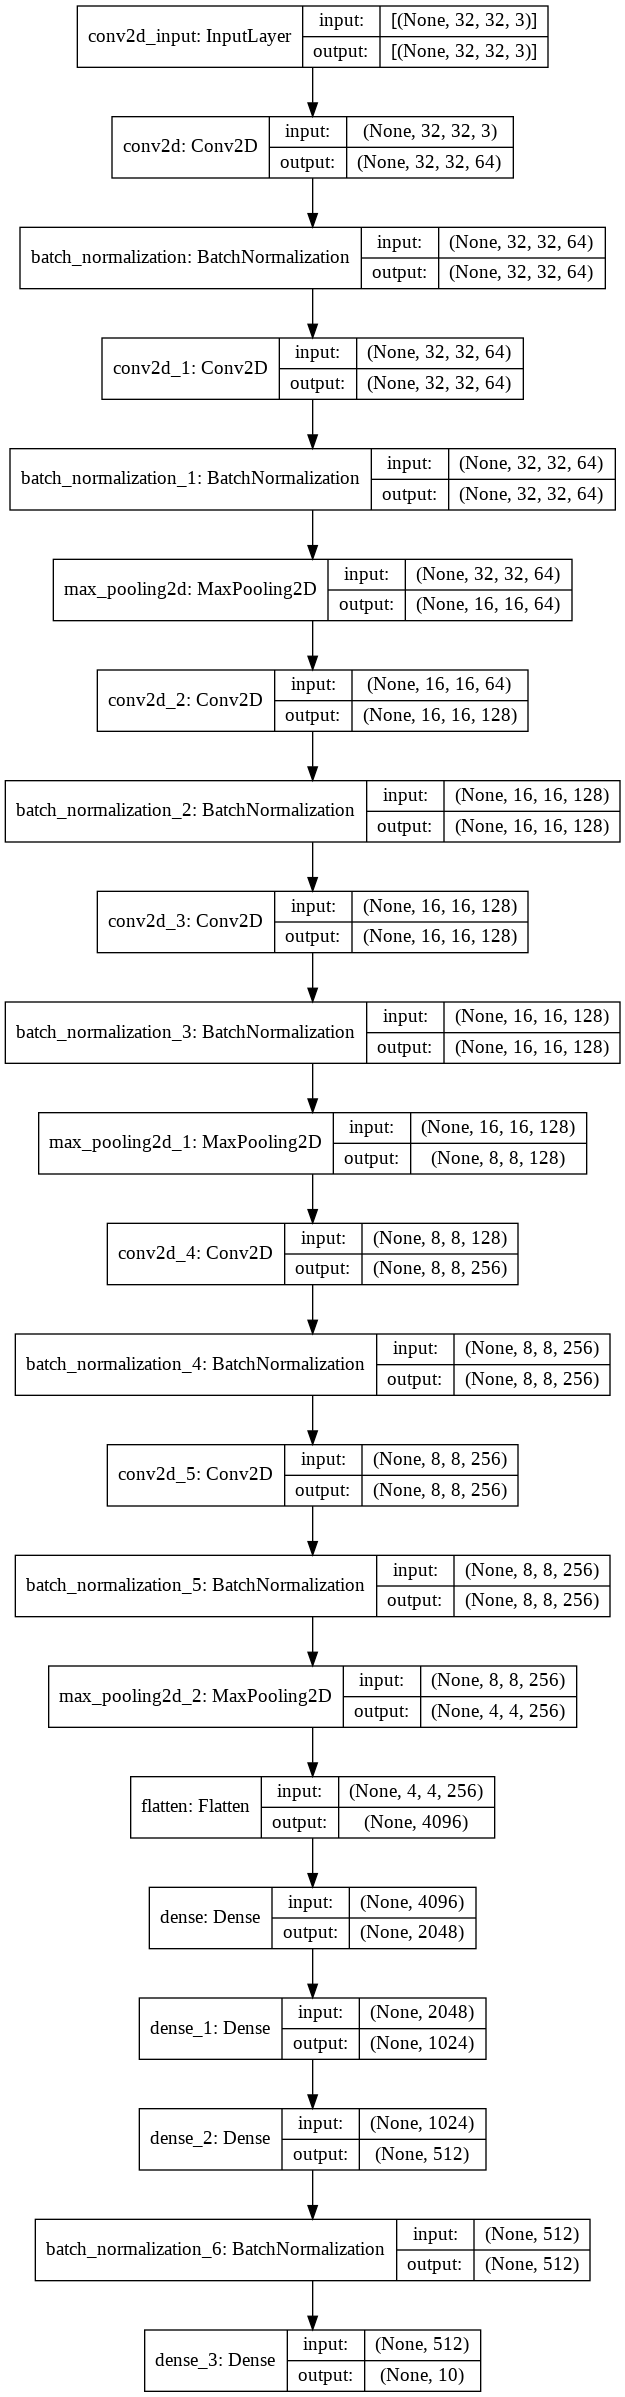

In [24]:
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)